# Competition dataset

## Phase 0: Imports and Data Read

In [68]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [69]:
train = pd.read_csv('data/train_radiomics_hipocamp.csv')
test = pd.read_csv('data/test_radiomics_hipocamp.csv')
control = pd.read_csv('data/train_radiomics_occipital_CONTROL.csv')

## Phase 1: Shallow Data Exploration

In [70]:
train.shape

(305, 2181)

In [71]:
train.columns

Index(['ID', 'Image', 'Mask', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       ...
       'lbp-3D-k_glszm_ZonePercentage', 'lbp-3D-k_glszm_ZoneVariance',
       'lbp-3D-k_ngtdm_Busyness', 'lbp-3D-k_ngtdm_Coarseness',
       'lbp-3D-k_ngtdm_Complexity', 'lbp-3D-k_ngtdm_Contrast',
       'lbp-3D-k_ngtdm_Strength', 'Sex', 'Age', 'Transition'],
      dtype='object', length=2181)

In [72]:
train.head()

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [73]:
train.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


In [74]:
train.duplicated().any()

False

In [75]:
train.isna().any()

ID                                  False
Image                               False
Mask                                False
diagnostics_Versions_PyRadiomics    False
diagnostics_Versions_Numpy          False
                                    ...  
lbp-3D-k_ngtdm_Contrast             False
lbp-3D-k_ngtdm_Strength             False
Sex                                 False
Age                                 False
Transition                          False
Length: 2181, dtype: bool

In [76]:
train.dtypes

ID                                   object
Image                                object
Mask                                 object
diagnostics_Versions_PyRadiomics     object
diagnostics_Versions_Numpy           object
                                     ...   
lbp-3D-k_ngtdm_Contrast             float64
lbp-3D-k_ngtdm_Strength             float64
Sex                                   int64
Age                                 float64
Transition                           object
Length: 2181, dtype: object

### Missing Value Detection

In [77]:
train.isna().sum()

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64

In [78]:
test.isna().sum()

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Complexity           0
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Length: 2180, dtype: int64

## Phase 2: Data treatment

In [79]:
pattern = re.compile(r'^diagnostics_')

train = train.loc[:, ~train.columns.str.contains(pattern)]
test = test.loc[:, ~test.columns.str.contains(pattern)]
control = control.loc[:, ~control.columns.str.contains(pattern)]

train.drop(['ID','Mask','Image'], inplace=True, axis=1)
test.drop(['ID','Mask','Image'], inplace=True, axis=1)
control.drop(['ID','Mask','Image'], inplace=True, axis=1)

## Phase 3: Advanced data exploration

In [80]:
test

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
0,0.407223,0.096929,10.641164,109.782918,76.400262,76.321688,47.010637,76.954532,6693.500000,44.706088,...,2.882307,0.012155,230174.976800,311.614436,0.002082,0.142371,0.009727,0.002153,1,84.9
1,0.432795,0.096712,10.249435,105.979255,77.103826,78.025637,47.169906,78.051265,8113.875000,45.867286,...,2.724261,0.011611,291753.141939,387.905335,0.001698,0.143956,0.010269,0.001758,1,72.4
2,0.422635,0.107836,11.116675,103.088450,76.006579,80.156098,47.169906,80.255841,7718.041667,43.568739,...,2.625920,0.010947,288449.451903,401.448469,0.001681,0.153188,0.011797,0.001724,1,71.6
3,0.411789,0.104226,11.324564,108.653645,81.024688,82.024387,49.091751,85.539465,8392.250000,44.742336,...,2.609760,0.009302,350725.996795,607.596915,0.001241,0.189832,0.018383,0.001276,1,76.7
4,0.437484,0.099548,10.281734,103.283883,73.389373,71.063352,43.737855,74.027022,7141.250000,45.185072,...,2.890169,0.010197,285390.090029,402.036637,0.001707,0.161413,0.012902,0.001759,1,70.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.401190,0.089520,9.528224,106.437263,77.620873,76.321688,43.416587,77.627315,6613.416667,42.701533,...,2.479054,0.014154,199762.795125,270.914069,0.002350,0.126813,0.008219,0.002407,1,75.7
96,0.403047,0.097097,10.030156,103.300604,72.249567,72.006944,40.496913,72.512068,5044.833333,41.635029,...,2.408499,0.012845,159105.825528,291.753538,0.002370,0.164272,0.013255,0.002459,0,72.5
97,0.441044,0.105865,11.123054,105.068183,73.545904,72.111026,45.617979,74.067537,8359.000000,46.339719,...,2.718685,0.011389,314960.471246,322.348738,0.001939,0.122373,0.007337,0.002012,1,76.7
98,0.467574,0.115733,11.737726,101.420328,73.334848,73.061618,47.801674,73.790243,7344.000000,47.421532,...,2.807286,0.012141,244125.365556,435.775353,0.001601,0.168529,0.013976,0.001651,1,84.9


In [81]:
train

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,0.420040,0.106547,10.757474,100.964915,72.034714,71.175839,43.416587,72.034714,7033.166667,42.409319,...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,0.425482,0.102532,10.432362,101.747321,73.246160,73.109507,44.102154,73.252986,7716.583333,43.291655,...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,0.447685,0.135582,14.370911,105.993915,79.762146,79.056942,47.853944,81.154174,6636.083333,47.451935,...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,0.418896,0.099626,10.639815,106.797600,78.102497,77.006493,45.793013,78.217645,8248.583333,44.737083,...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,0.411851,0.080719,8.885188,110.075144,75.432089,75.239617,43.462628,75.848533,5897.791667,45.334518,...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.401673,0.101371,10.835627,106.890712,77.414469,77.233412,42.720019,78.166489,7190.166667,42.935157,...,0.010593,270974.110643,438.460201,0.001615,0.170377,0.014580,0.001667,1,72.2,CN-CN
301,0.445362,0.090595,8.986151,99.189845,70.349129,70.007142,45.486262,70.356236,5762.666667,44.175383,...,0.006170,350646.909722,434.517852,0.001757,0.195109,0.019239,0.001813,0,75.0,CN-CN
302,0.437854,0.106585,11.254700,105.593223,80.305666,82.219219,45.099889,82.686154,6787.708333,46.234417,...,0.009848,290668.100995,311.365820,0.002103,0.137740,0.009686,0.002170,1,79.6,MCI-AD
303,0.463489,0.095407,9.694175,101.608857,74.168727,74.027022,46.400431,75.723180,7227.458333,47.094617,...,0.014174,211613.548120,349.919451,0.001890,0.145615,0.010622,0.001936,0,62.4,MCI-MCI


In [82]:
control

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,0.315029,0.267306,34.411652,128.734925,105.171289,105.385008,41.773197,105.607765,17663.750000,40.555245,...,0.004785,1.727126e+06,98.443622,0.005262,0.021912,0.000244,0.005402,0,77.1,CN-CN
1,0.361175,0.272491,32.329625,118.644809,97.082439,101.980390,44.598206,101.985293,18006.000000,42.851505,...,0.008440,1.012217e+06,190.711701,0.002800,0.039662,0.000799,0.002887,1,83.4,CN-CN
2,0.374464,0.288734,37.469777,129.772712,108.295891,111.758669,51.971146,112.472219,22176.666667,48.595203,...,0.006291,1.646099e+06,285.078630,0.001925,0.047025,0.001358,0.001915,1,81.3,AD-AD
3,0.355133,0.288648,37.694946,130.591620,111.157546,110.476242,52.952809,111.377736,23716.708333,46.377395,...,0.005281,2.169425e+06,172.000383,0.003052,0.027462,0.000426,0.003078,1,79.6,CN-MCI
4,0.320548,0.275708,36.716529,133.171648,108.295891,106.381389,44.283180,108.342051,18094.416667,42.687880,...,0.004082,2.073170e+06,75.795004,0.006768,0.016754,0.000135,0.007042,0,80.1,CN-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.323020,0.273378,38.223907,139.820574,115.108644,114.017543,50.358713,119.306328,19097.208333,45.164803,...,0.005259,1.662847e+06,108.998046,0.004758,0.023023,0.000264,0.004918,1,72.2,CN-CN
301,0.301858,0.247309,31.688691,128.134008,100.044990,101.651365,42.107007,102.279030,16466.000000,38.678271,...,0.006639,1.182255e+06,117.232960,0.004443,0.027417,0.000343,0.004668,0,75.0,CN-CN
302,0.321084,0.294466,38.875444,132.019978,112.361025,111.449540,43.965896,113.375482,23752.708333,42.389454,...,0.007217,1.561472e+06,195.341522,0.002695,0.031501,0.000506,0.002767,1,79.6,MCI-AD
303,0.381592,0.298237,39.695412,133.100350,109.165013,110.113578,49.648766,110.792599,26054.916667,50.790025,...,0.004703,2.598564e+06,167.533070,0.003106,0.025232,0.000308,0.003282,0,62.4,MCI-MCI


## Phase 4: Data treatment pre-modeling

In [83]:
train['Transition'] = train['Transition'].map({'CN-CN': 0, 'CN-MCI': 1, 'MCI-MCI': 2, 'MCI-AD': 3, 'AD-AD': 4})

In [84]:
train[train.columns[1:]].corr()['Transition'][:].to_csv('correlation.csv')

In [85]:
# remove todas as colunas com correlação menor que 0.1

test['Transition'] = None
control['Transition'] = None

correlation_threshold = 0.1

correlations = train.corr()
tc = correlations['Transition']
selected_columns = tc[abs(tc) > correlation_threshold].index

train.drop(train.columns.difference(selected_columns), axis=1, inplace=True)
test.drop(test.columns.difference(selected_columns), axis=1, inplace=True)
control.drop(control.columns.difference(selected_columns), axis=1, inplace=True)

In [86]:
train[train.columns[1:]].corr()['Transition'][:].to_csv('correlation2.csv')

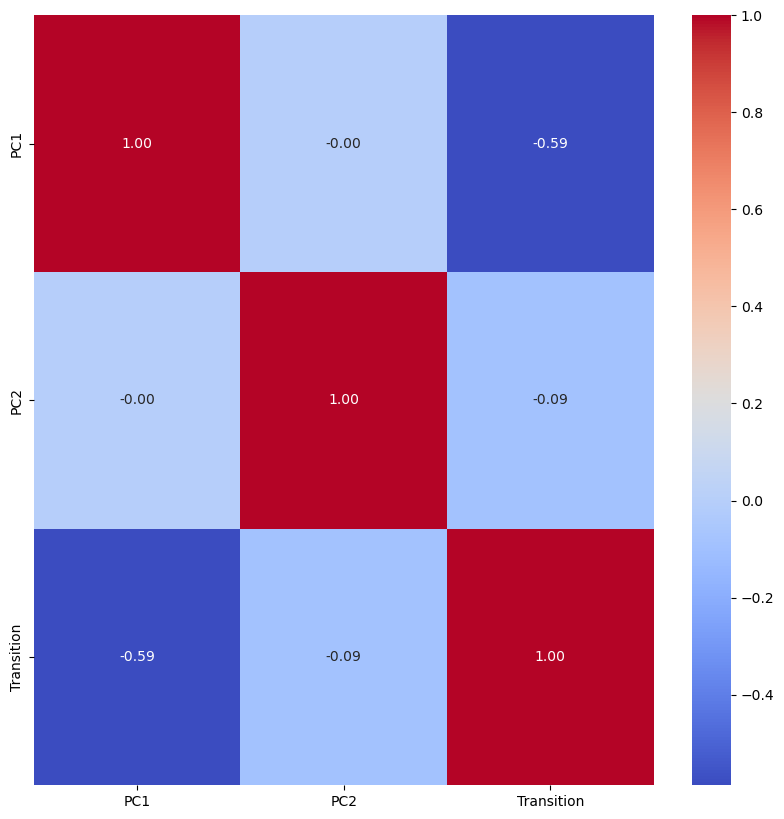

In [87]:
train = train[selected_columns]
test = test[selected_columns]
control = control[selected_columns]

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop('Transition', axis=1))
test_scaled = scaler.transform(test.drop('Transition', axis=1))
control_scaled = scaler.transform(control.drop('Transition', axis=1))

train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns[:-1])
train_scaled_df['Transition'] = train['Transition'].values

test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns[:-1])
test_scaled_df['Transition'] = test['Transition'].values

control_scaled_df = pd.DataFrame(control_scaled, columns=control.columns[:-1])
control_scaled_df['Transition'] = control['Transition'].values

X_train = train_scaled_df.drop('Transition', axis=1)
y_train = train_scaled_df['Transition']
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(test_scaled_df.drop('Transition', axis=1))
control_pca = pca.transform(control_scaled_df.drop('Transition', axis=1))

train_balanced_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
train_balanced_pca_df['Transition'] = y_train_balanced

test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
test_pca_df['Transition'] = test_scaled_df['Transition'].values

control_pca_df = pd.DataFrame(control_pca, columns=[f'PC{i+1}' for i in range(control_pca.shape[1])])
control_pca_df['Transition'] = control_scaled_df['Transition'].values

control_pca_df.drop('Transition', axis=1, inplace=True)
test_pca_df.drop('Transition', axis=1, inplace=True)

plt.figure(figsize=(10, 10))
sns.heatmap(train_balanced_pca_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [88]:
train['Transition'].value_counts()

Transition
0    96
2    71
3    68
4    60
1    10
Name: count, dtype: int64

In [89]:
train_balanced_pca_df.to_csv('data/train_pca.csv', index=False)
test_pca_df.to_csv('data/test_pca.csv', index=False)
control_pca_df.to_csv('data/control_pca.csv', index=False)